In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')
from numerize import numerize
import plotly.express as px


pd.set_option('display.max_columns',None)

In [2]:
#Unzip file from zipfile

from zipfile import ZipFile
import zipfile

filepath = os.getcwd()
with zipfile.ZipFile('healthcare_dataset.csv.zip','r') as zip_ref:
    zip_ref.extractall(filepath)

In [3]:
df = pd.read_csv('healthcare_dataset.csv')

In [4]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [5]:
#Remove all unwanted white space from dataset
df = df.replace(r'\s+', ' ', regex=True)

In [6]:
#Change the name of columns 
df.columns = df.columns.str.replace(" ","_")

In [7]:
#Checking null values percentage
print("==="*25)
print("Checking Data has null values or not")
print("==="*25)
print(round(df.isnull().sum() * 100 / len(df),2))

Checking Data has null values or not
Name                  0.0
Age                   0.0
Gender                0.0
Blood_Type            0.0
Medical_Condition     0.0
Date_of_Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance_Provider    0.0
Billing_Amount        0.0
Room_Number           0.0
Admission_Type        0.0
Discharge_Date        0.0
Medication            0.0
Test_Results          0.0
dtype: float64


In [8]:
#Information
print("Data Information")
print("==="*25)
print(df.info())

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood_Type          10000 non-null  object 
 4   Medical_Condition   10000 non-null  object 
 5   Date_of_Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance_Provider  10000 non-null  object 
 9   Billing_Amount      10000 non-null  float64
 10  Room_Number         10000 non-null  int64  
 11  Admission_Type      10000 non-null  object 
 12  Discharge_Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test_Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
m

- Info looks good

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,51.452200,19.588974,18.000000,35.000000,52.000000,68.000000,85.000000
Billing_Amount,10000.0,25516.806778,14067.292709,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283
Room_Number,10000.0,300.082000,115.806027,101.000000,199.000000,299.000000,400.000000,500.000000


In [10]:
df.describe(include=object).T

,count,unique,top,freq
Name,10000,9378,Michael Johnson,7
Gender,10000,2,Female,5075
Blood_Type,10000,8,AB-,1275
Medical_Condition,10000,6,Asthma,1708
Date_of_Admission,10000,1815,2019-04-12,15
Doctor,10000,9416,Michael Johnson,7
Hospital,10000,8639,Smith PLC,19
Insurance_Provider,10000,5,Cigna,2040
Admission_Type,10000,3,Urgent,3391
Discharge_Date,10000,1834,2021-11-28,14


- Using describe we can retrieve lot of information

In [11]:
#Dividing dataset into numerical columns and categorical columns
df1=df.copy()
#Separating numerical and categorical columns
num=[]
cat=[]
for col in df1.columns:
    if pd.api.types.is_numeric_dtype(df1[col]):
        num.append(col)
    elif pd.api.types.is_object_dtype(df1[col]):
        cat.append(col)

print('Numerical columns : ',num)
print('Categorical columns : ',cat)

Numerical columns :  ['Age', 'Billing_Amount', 'Room_Number']
Categorical columns :  ['Name', 'Gender', 'Blood_Type', 'Medical_Condition', 'Date_of_Admission', 'Doctor', 'Hospital', 'Insurance_Provider', 'Admission_Type', 'Discharge_Date', 'Medication', 'Test_Results']


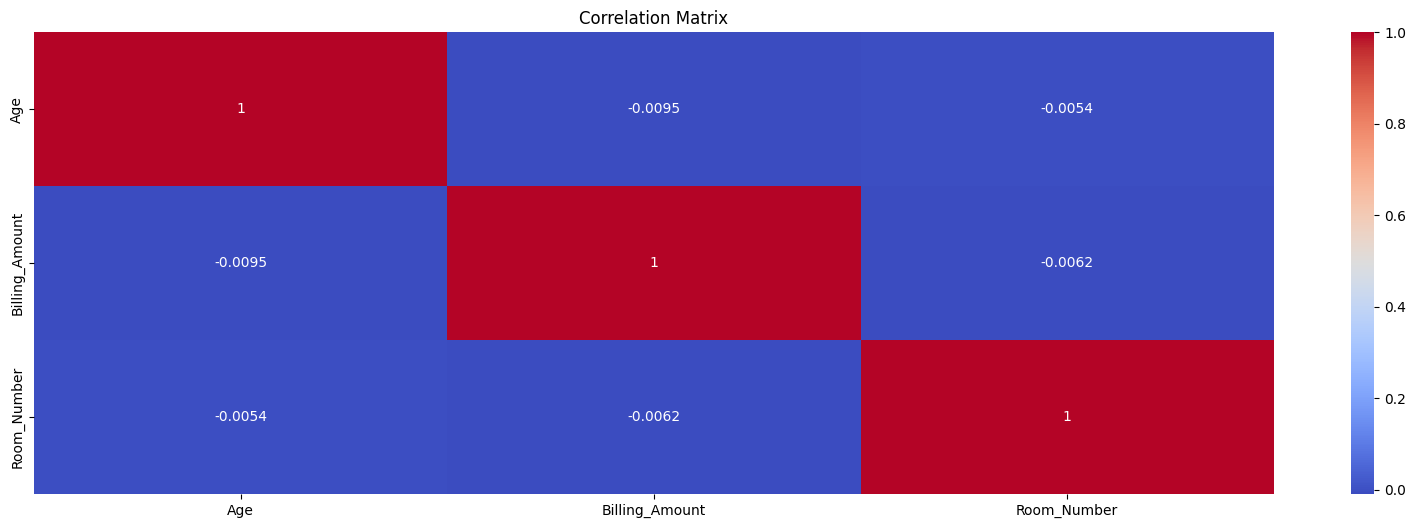

In [12]:
# Calculate the correlation matrix
numerical_columns = df.select_dtypes(include=['int64','float64']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(numerical_columns, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

- Correlation matrix do not show much of the infomation for plotted dataset
- It some what show features are negatively correlated

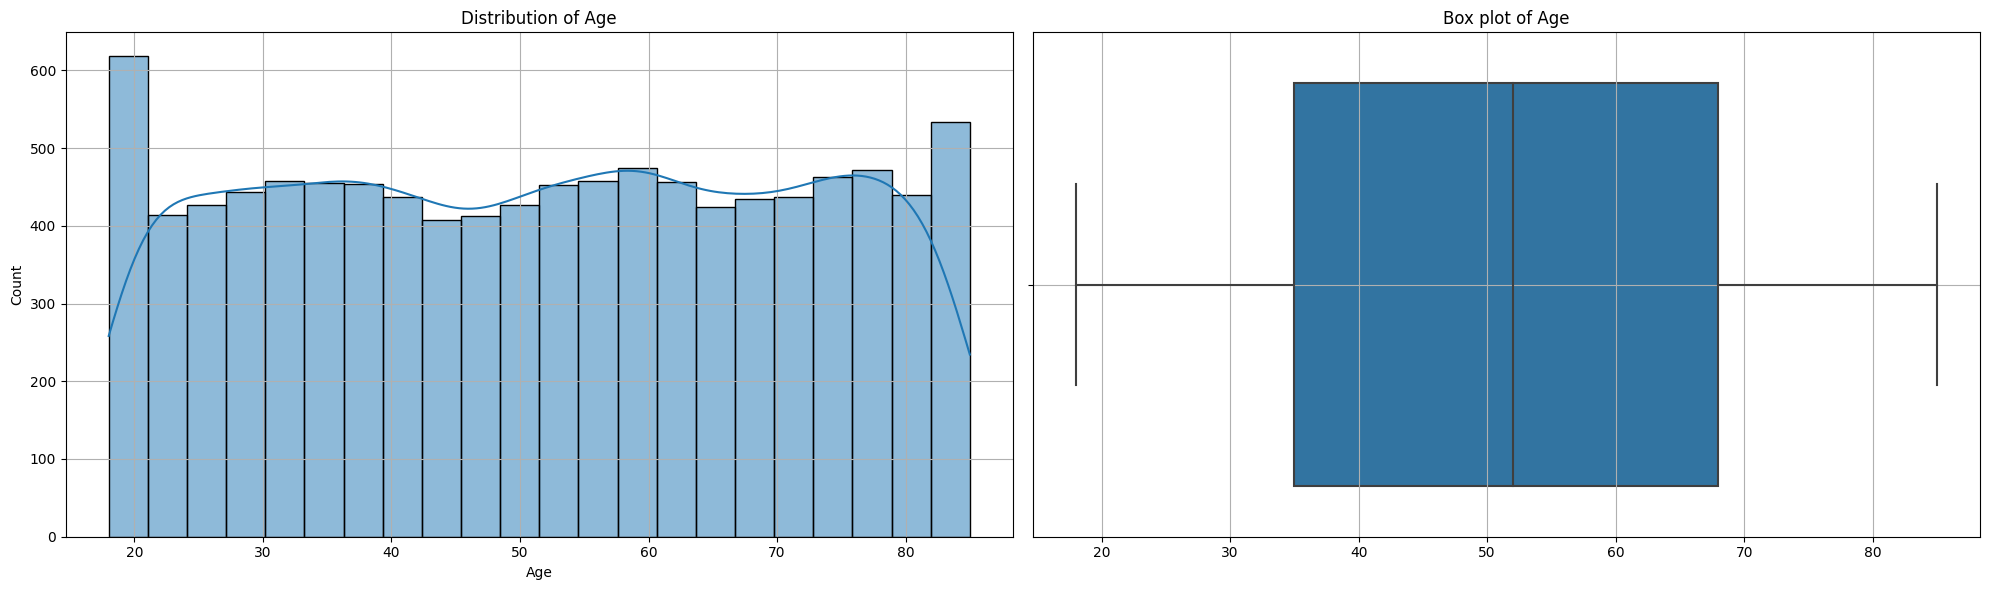

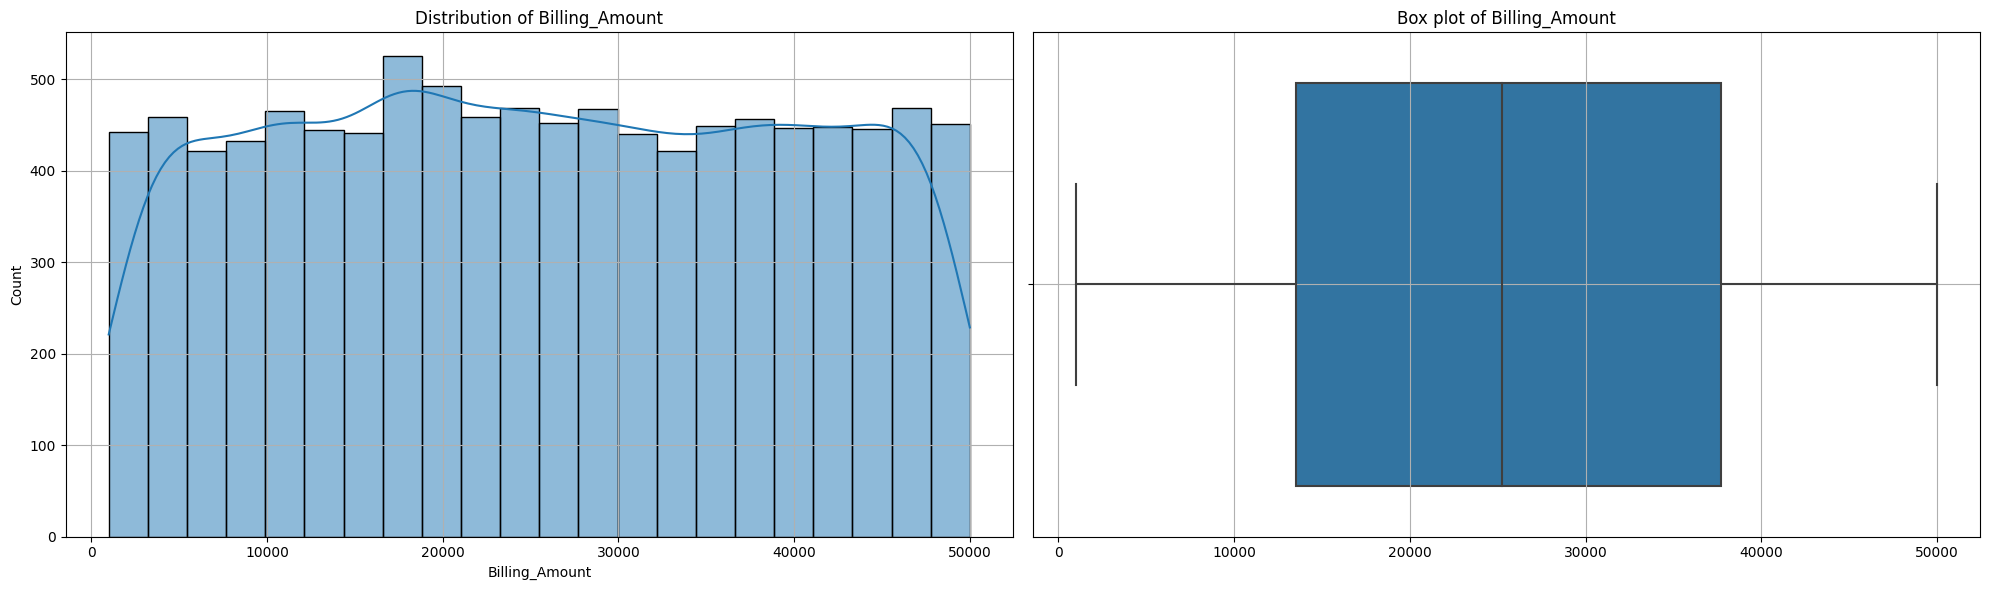

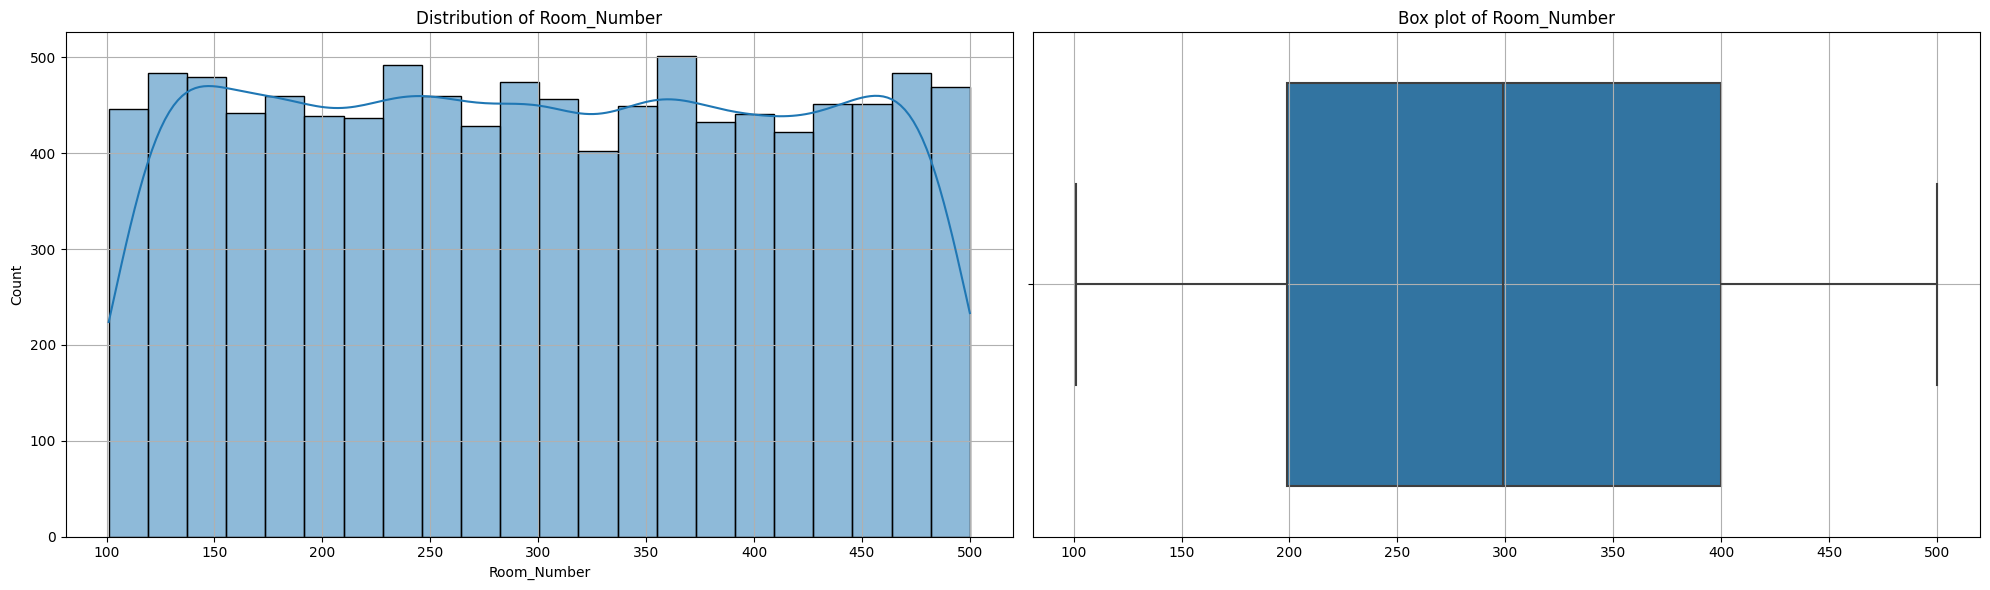

In [13]:
#Numerical column analysis
for i in num:
    fig,axes=plt.subplots(1,2,figsize=(20,6))

    sns.histplot(df1[i],kde=True,ax=axes[0])
    axes[0].set_title(f'Distribution of {i}')
    axes[0].grid(True)
    axes[1].set_xlabel('')

    sns.boxplot(x=df1[i],ax=axes[1])
    axes[1].set_title(f'Box plot of {i}')
    axes[1].grid(True)
    axes[1].set_xlabel('')

    plt.tight_layout()
    plt.show()

- we can see as we don't have outliers and data is normally distributed 

In [14]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood_Type', 'Medical_Condition',
       'Date_of_Admission', 'Doctor', 'Hospital', 'Insurance_Provider',
       'Billing_Amount', 'Room_Number', 'Admission_Type', 'Discharge_Date',
       'Medication', 'Test_Results'],
      dtype='object')

EDA

Univariate

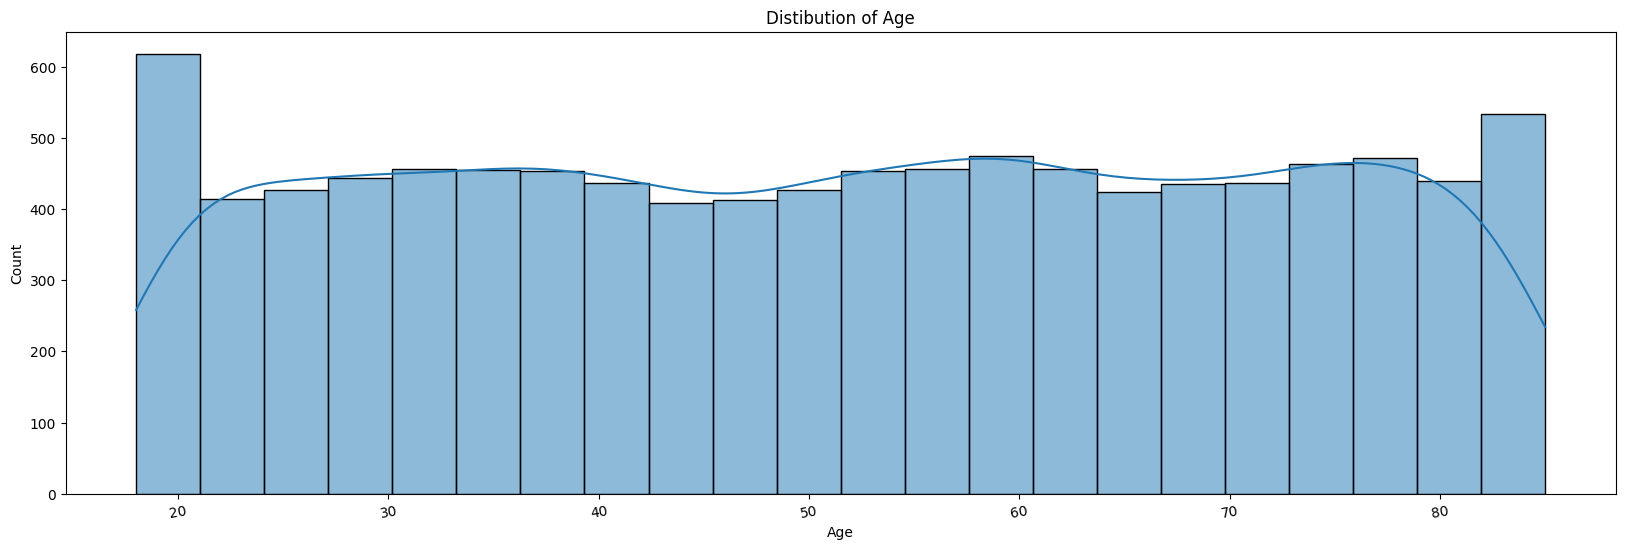

In [15]:
#Hist plot for Quantity
plt.figure(figsize=(20,6))
sns.histplot(data=df['Age'],kde=True)
plt.title('Distibution of Age')
plt.xticks(rotation=10)
plt.show()

- Most of the age is distributed around 20 and also at 80
- This shows younger age people's are more aware & concern with health-care rather then people's who's age lies in range of 21 - 65

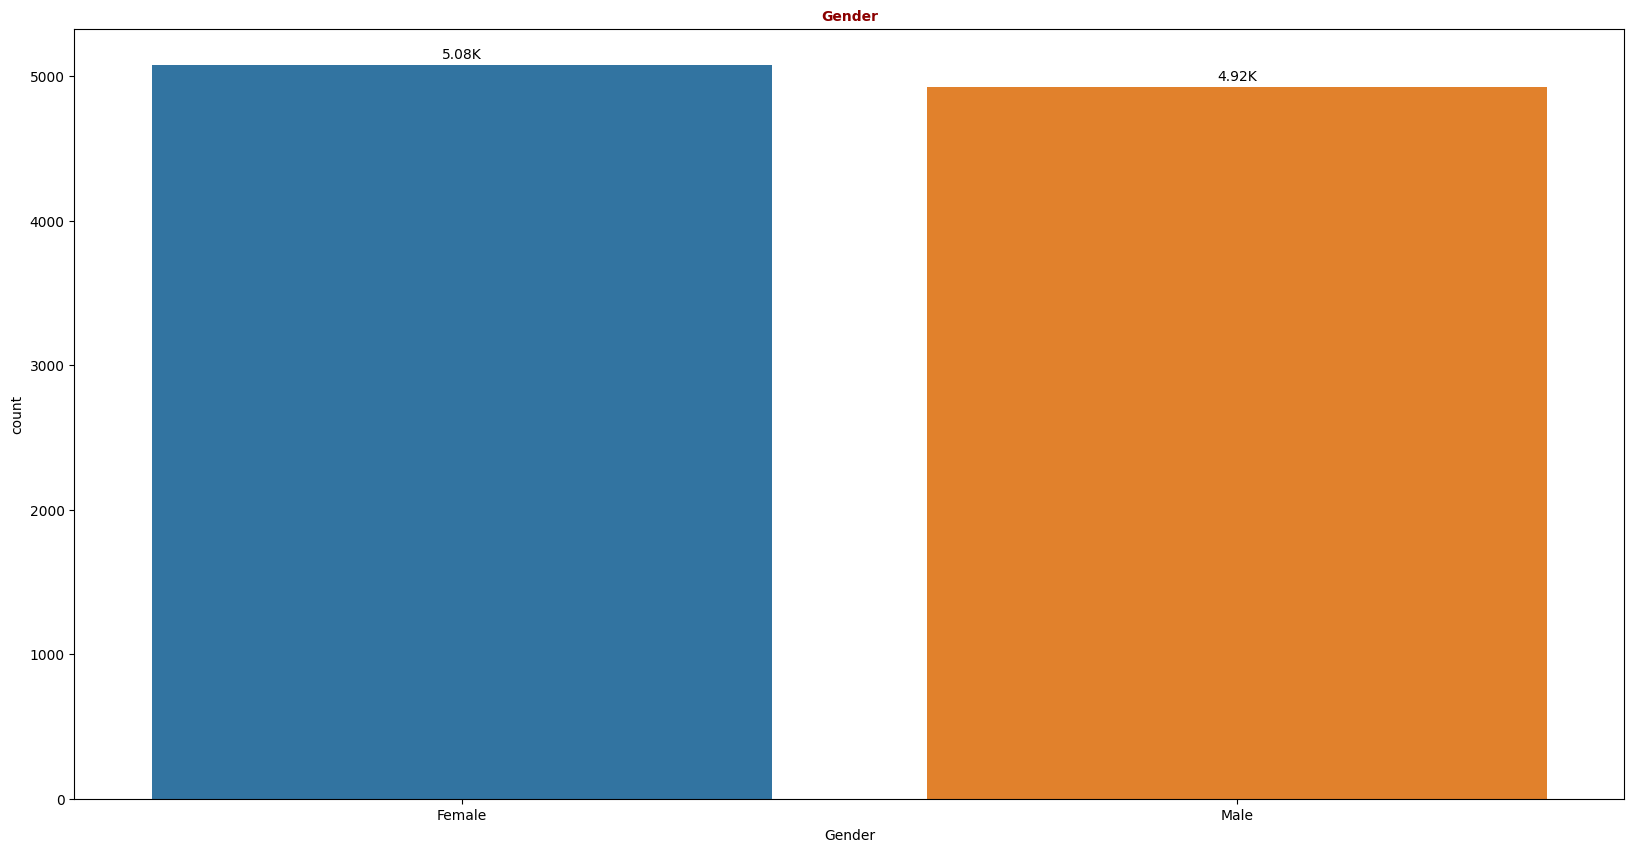

In [16]:
#Gender count plot

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Gender", ax = ax,order=df['Gender'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Gender", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- This graphs shows there are more females involved in heath care as this can be why women's live longer than men's(count is halfly near and difficult to compare)

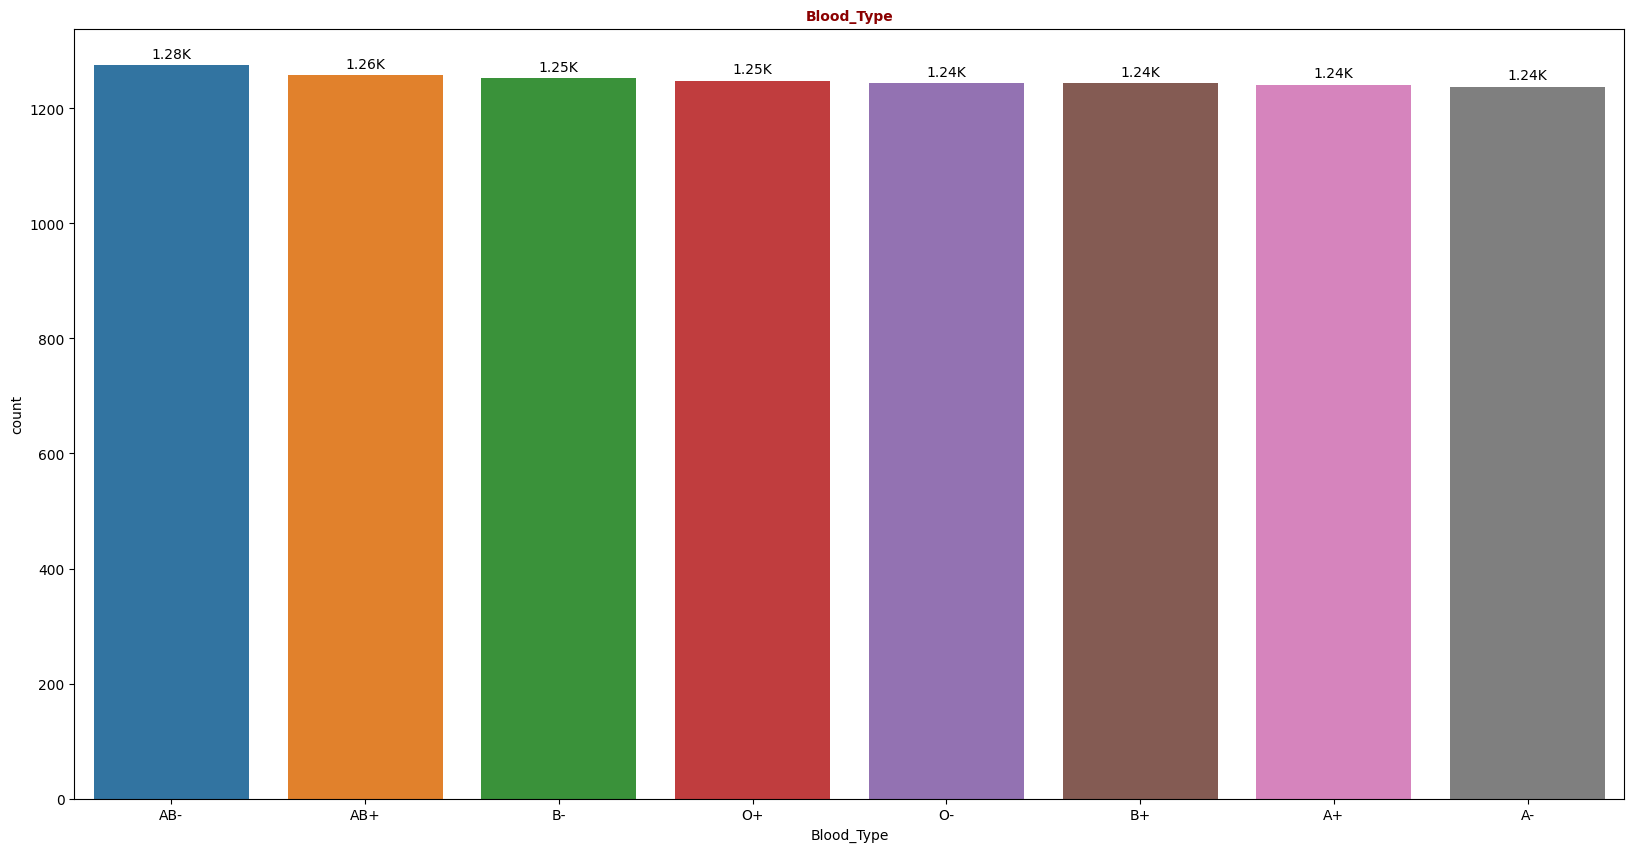

In [17]:
#Blood_Type

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Blood_Type", ax = ax,order=df['Blood_Type'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Blood_Type", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- AB is most counted blood group in the dataset followed up with AB+, B-, O+
- Type AB-negative blood is considered a universal plasma donor, meaning anyone can receive type AB-negative plasma

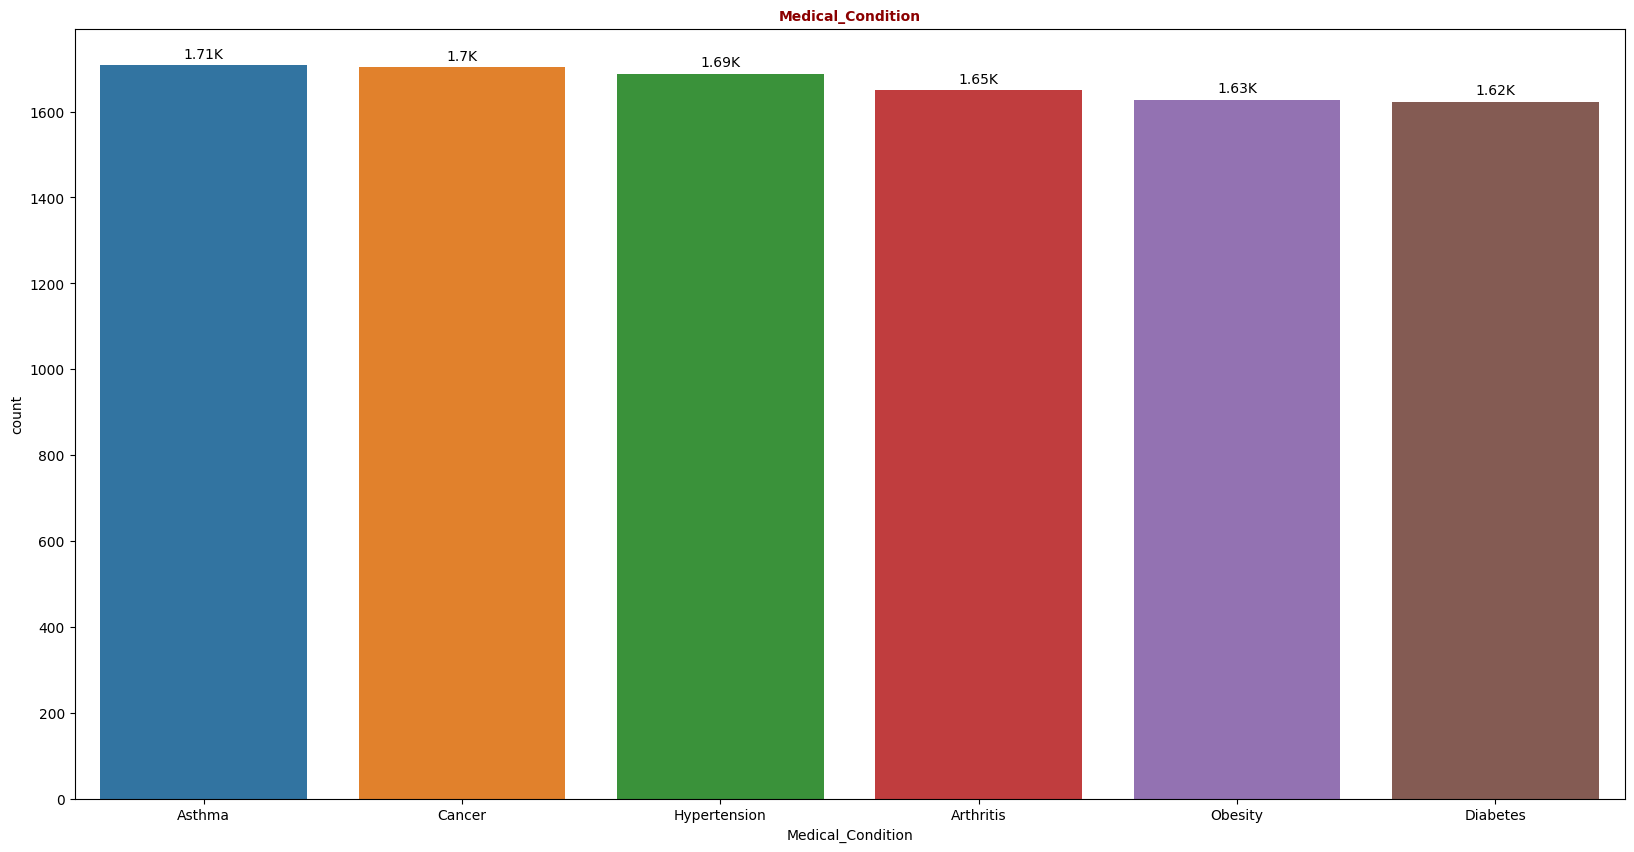

In [18]:
#Blood_Type

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Medical_Condition", ax = ax,order=df['Medical_Condition'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Medical_Condition", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- Most medical-condition is ASTHMA, CANCER, HYPERTENSION
- This shows most of the test are taken from most stressfull people segment and we can also sale them health benefits and sale health-insurance.

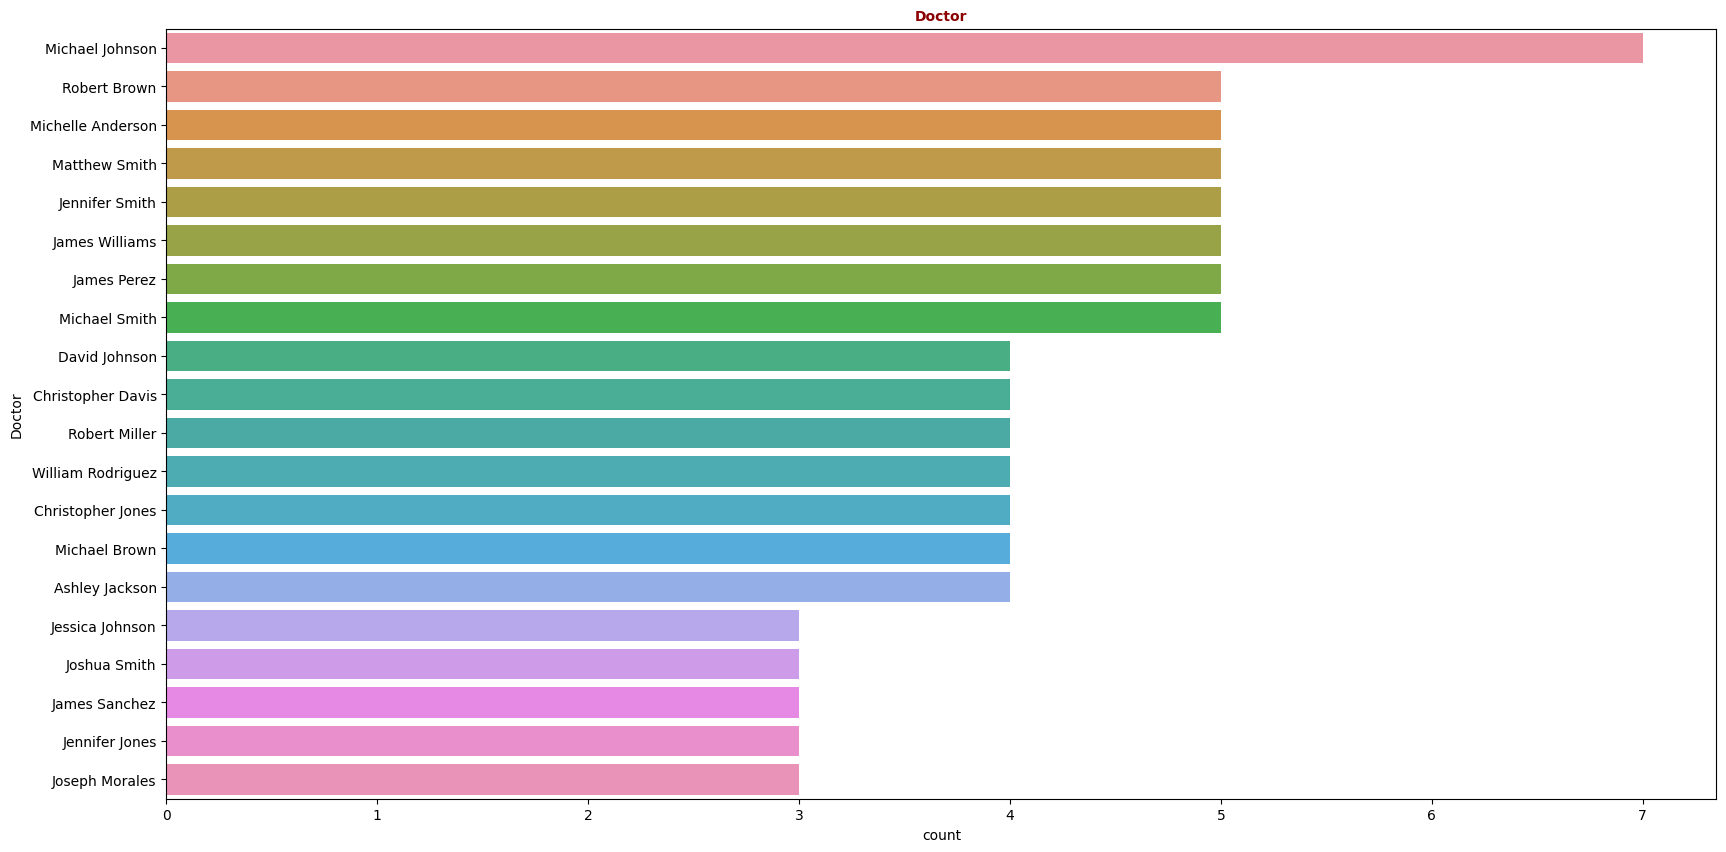

In [19]:
#Doctor

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, y = "Doctor", ax = ax,order=df['Doctor'].value_counts().iloc[:20].index)
ax.set_title("Doctor", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- Most counted doctor is *michael johnson*

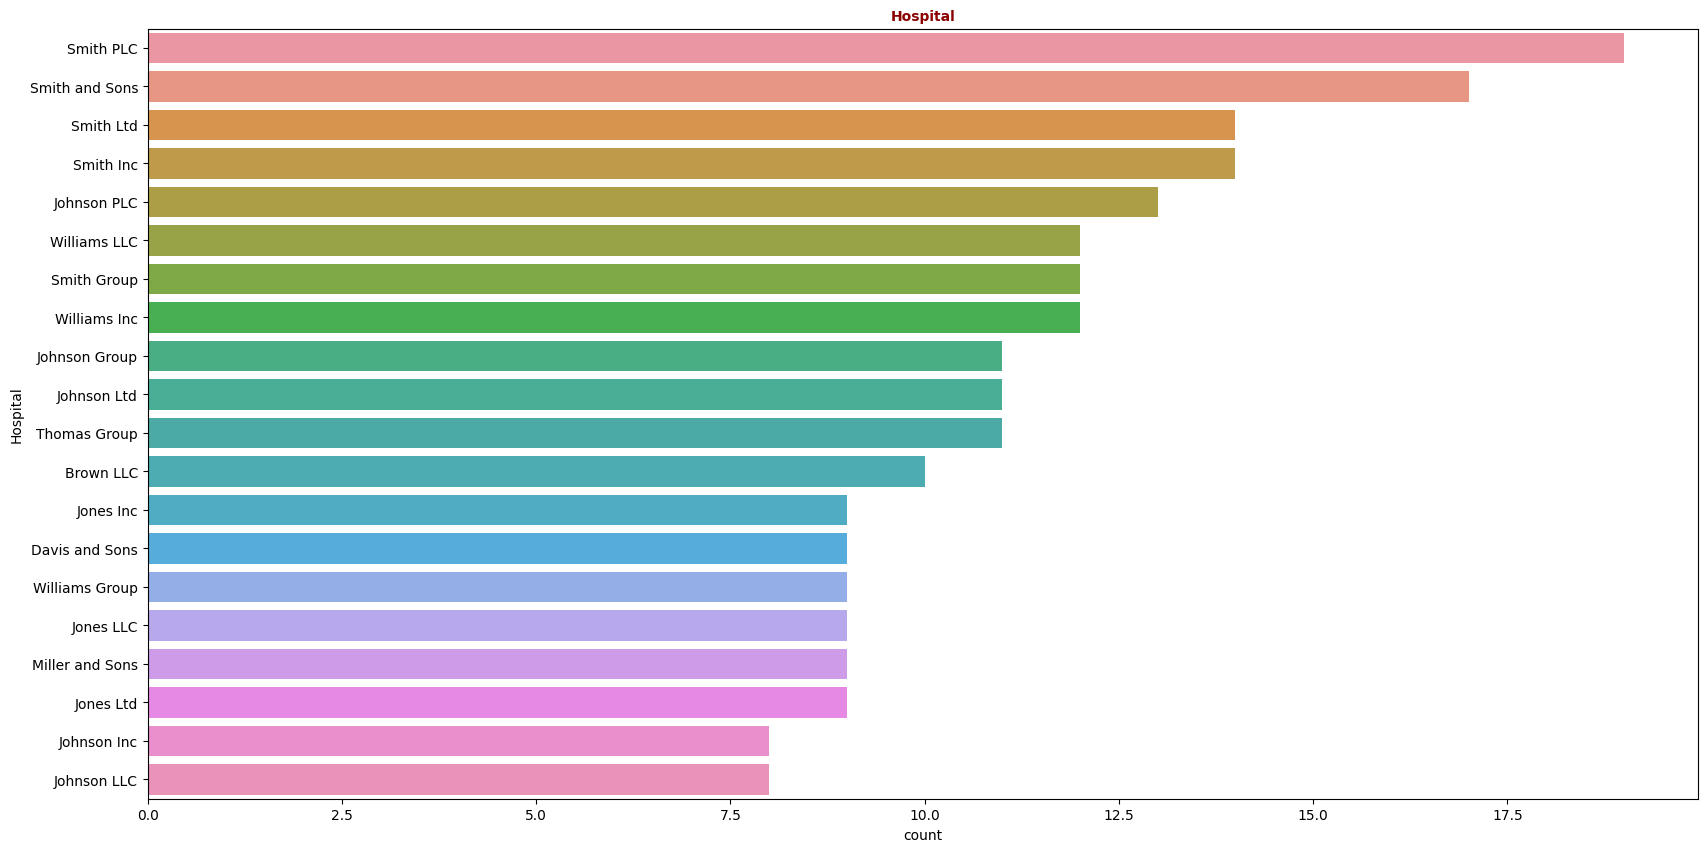

In [20]:
#Hospital

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, y = "Hospital", ax = ax,order=df['Hospital'].value_counts().iloc[:20].index)
ax.set_title("Hospital", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- Most frequent hospital in dataset is SMITH PLC,  and follow up by SMITH AND SONS, SMITH LTD, SMITH INC

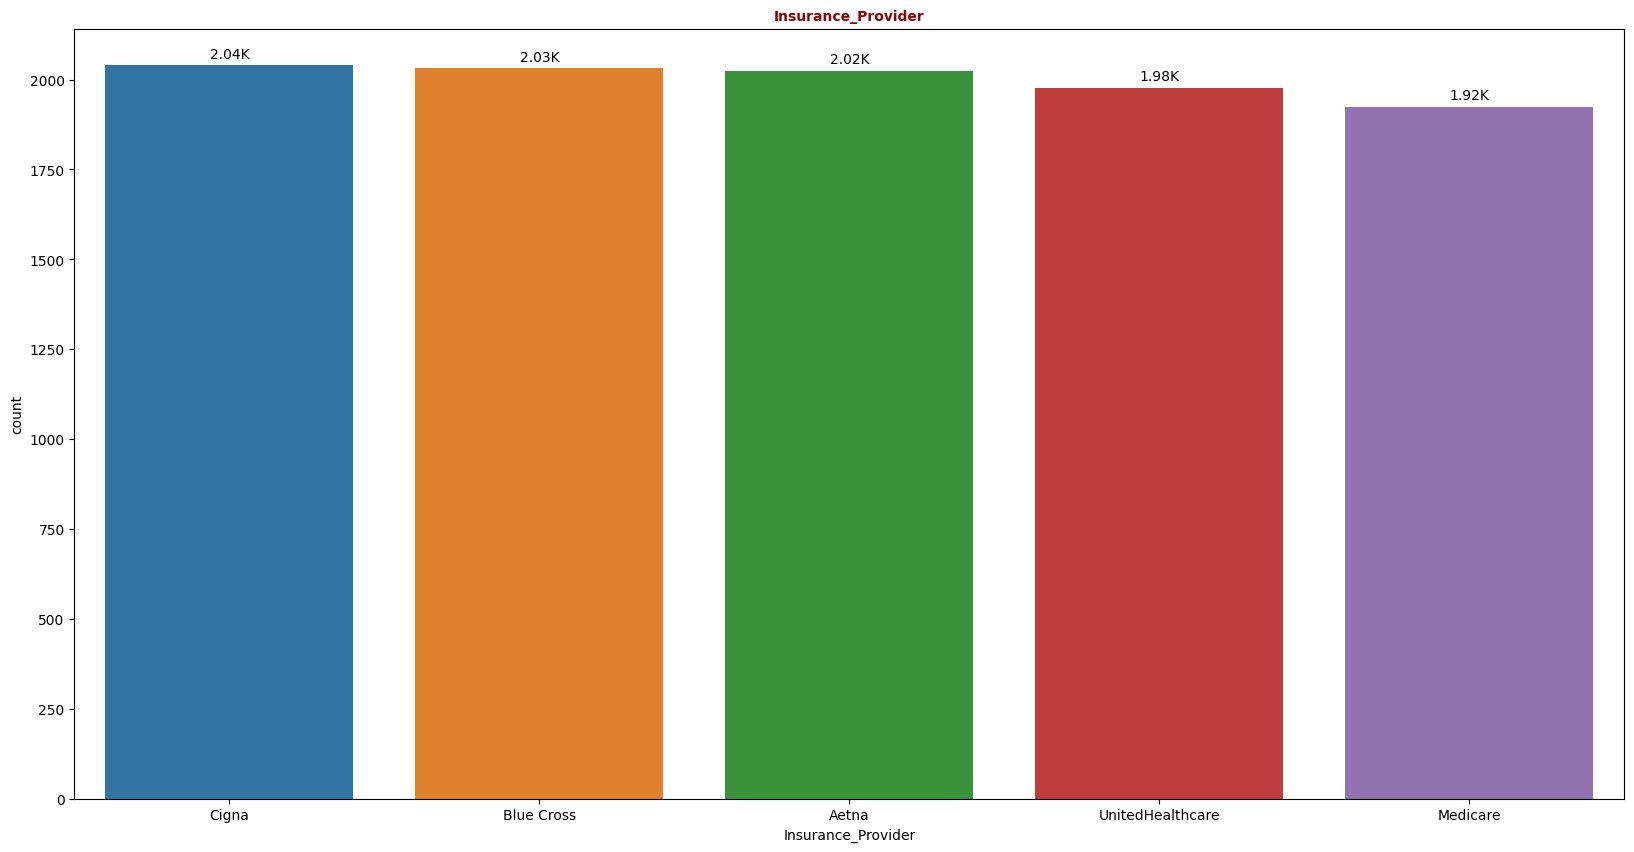

In [21]:
#Insurance_Provider

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Insurance_Provider", ax = ax,order=df['Insurance_Provider'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Insurance_Provider", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- Who have buyed cigna health-care are getting ill most.

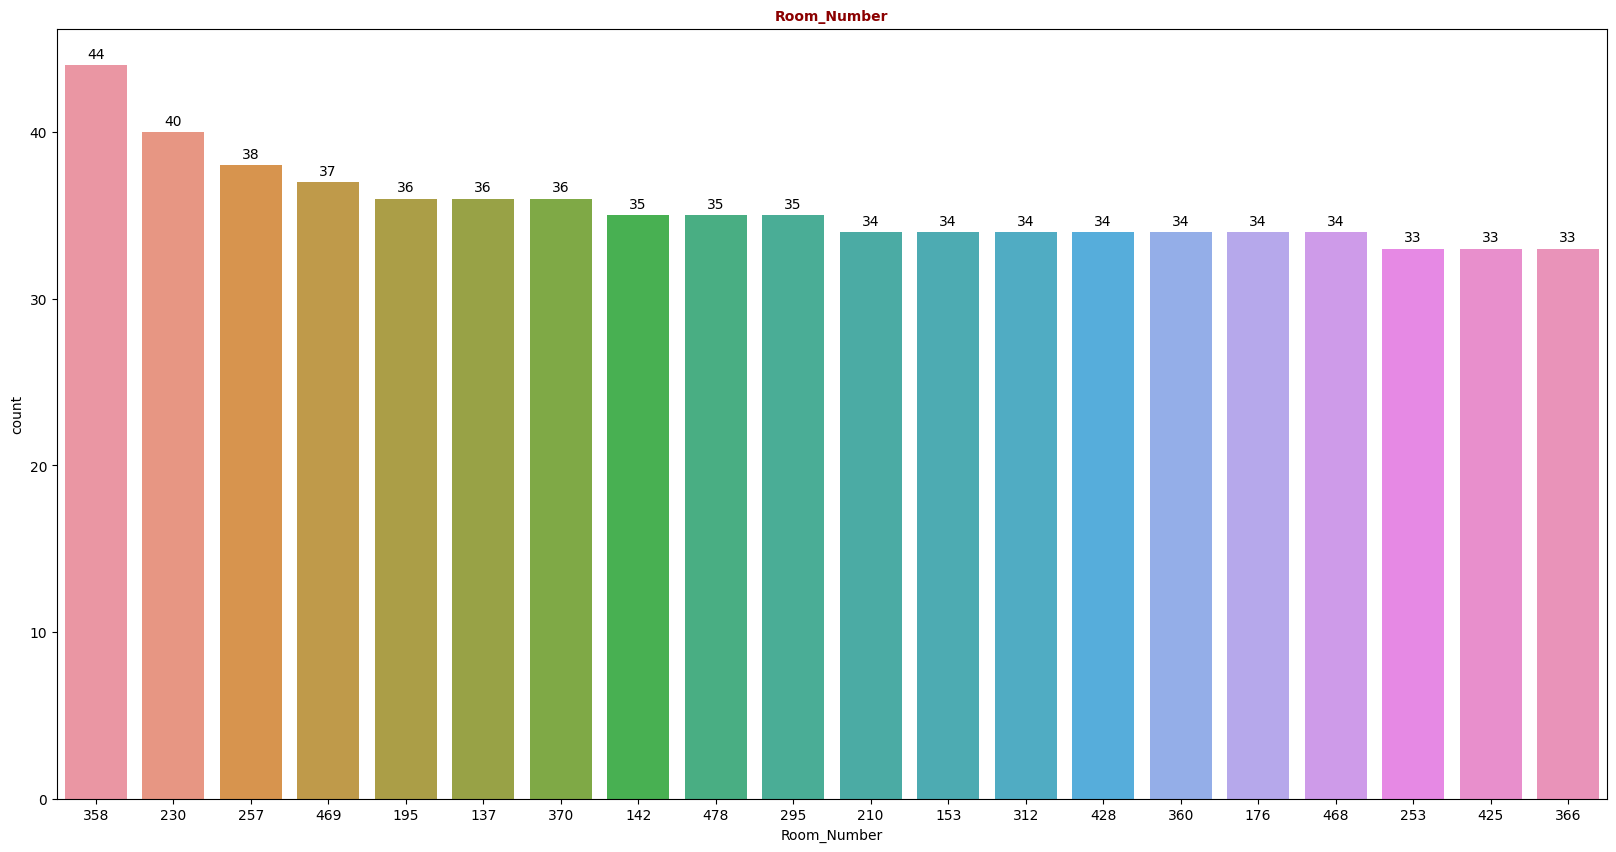

In [22]:
#Room_Number

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Room_Number", ax = ax,order=df['Room_Number'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Room_Number", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

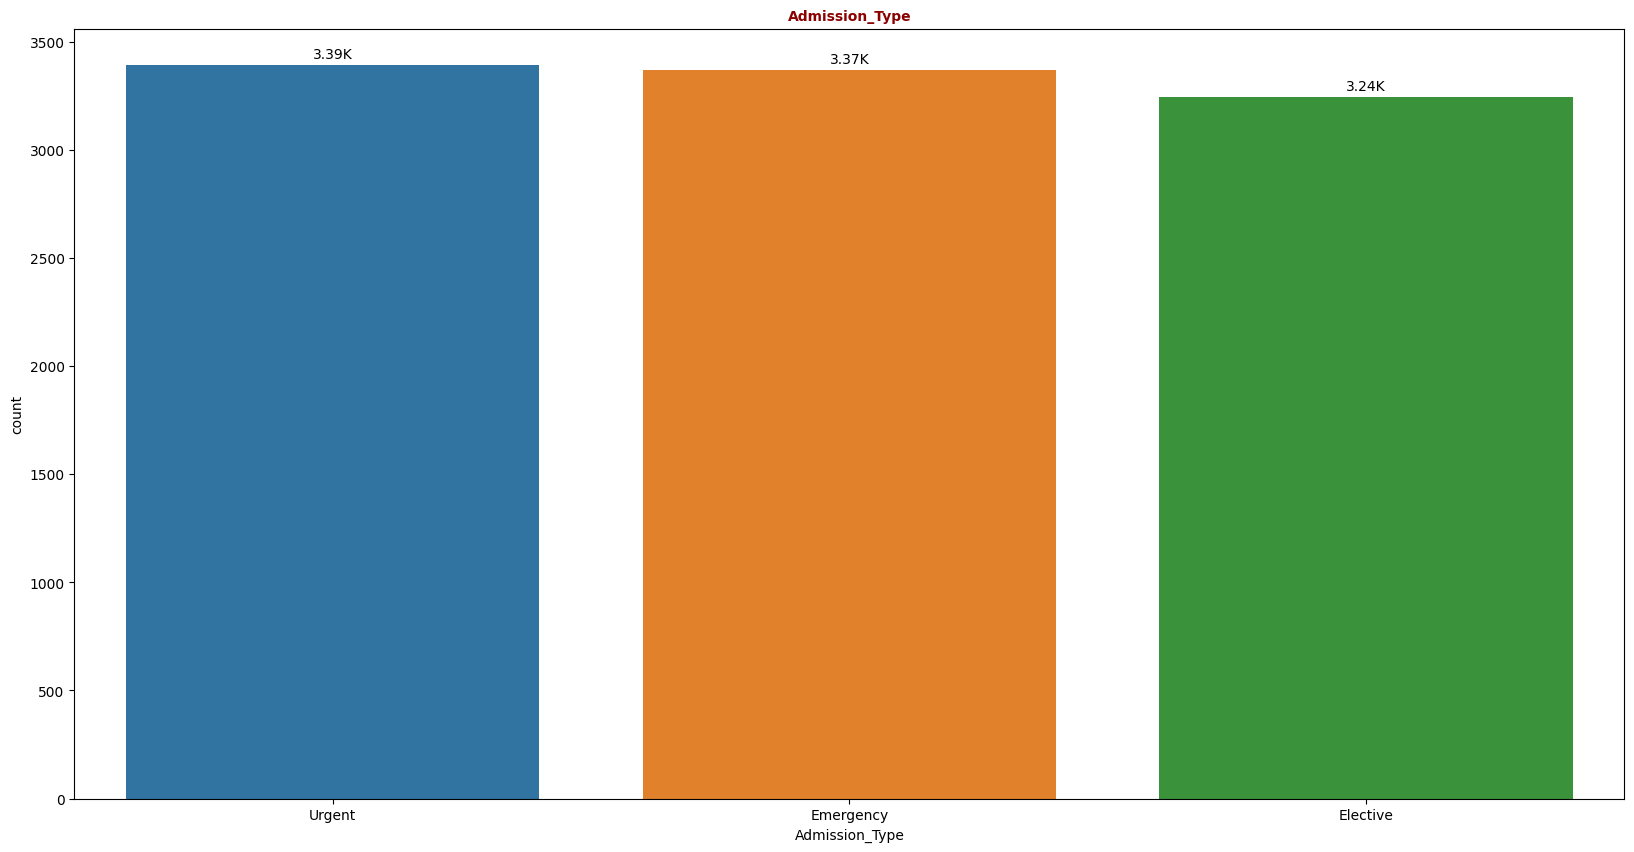

In [23]:
#Admission_Type

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Admission_Type", ax = ax,order=df['Admission_Type'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Admission_Type", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- Most cases are marked as urgent

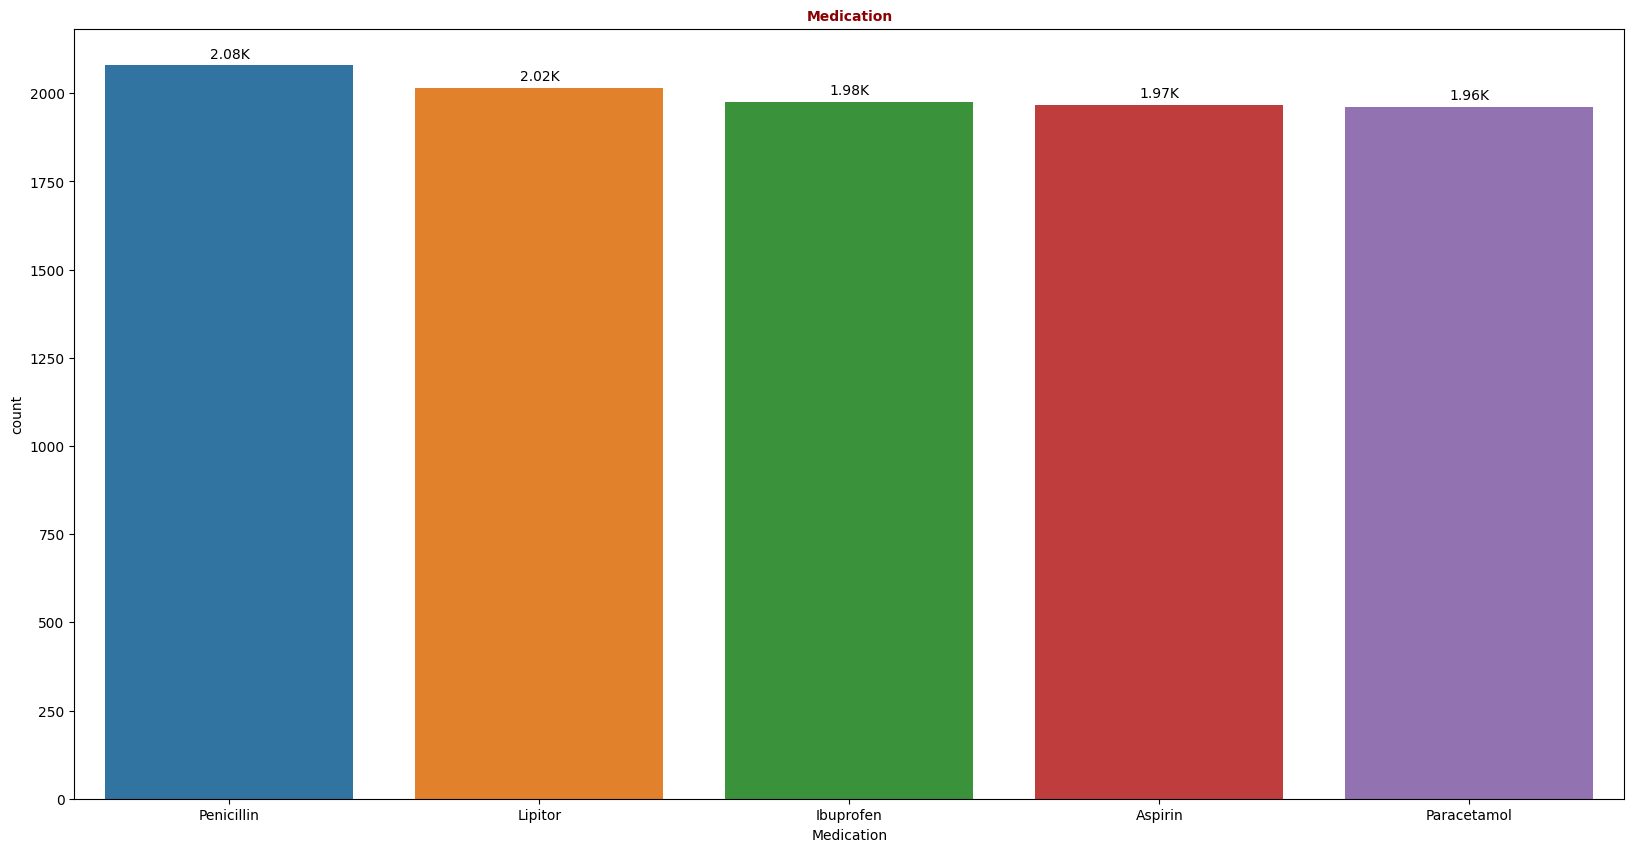

In [24]:
#Medication

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Medication", ax = ax,order=df['Medication'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Medication", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- Penicillin is a medication used to manage and treat a wide range of infections. It is in the beta-lactam antibiotic class of drugs. This activity describes penicillin's indications, action, and contraindications as a valuable agent in treating infection.

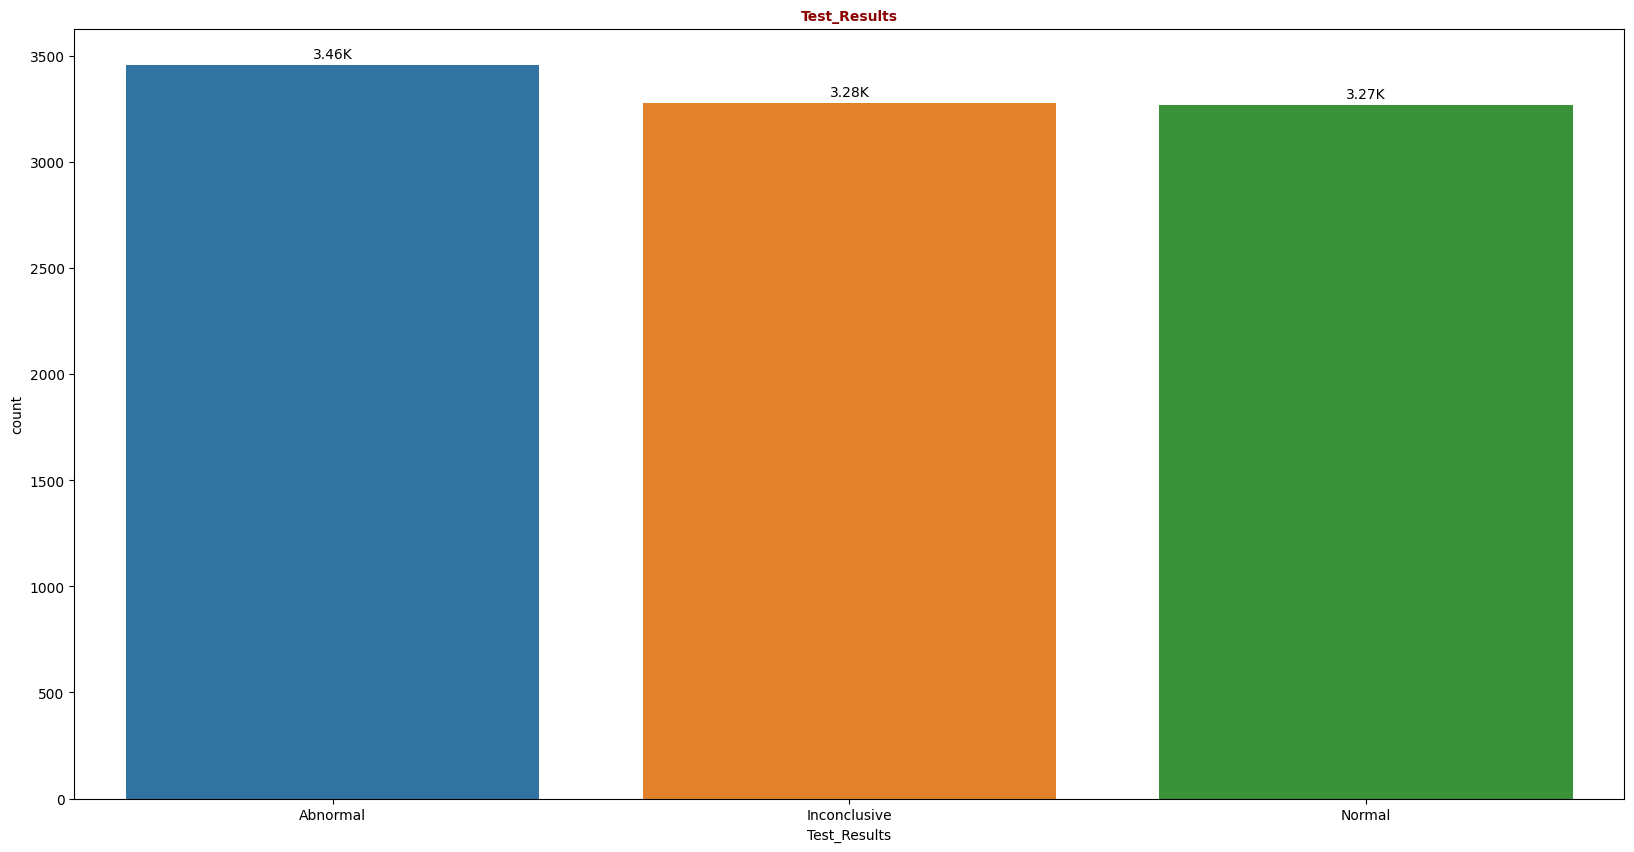

In [25]:
#Test_Results

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Test_Results", ax = ax,order=df['Test_Results'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Test_Results", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

In [27]:
#Bi-variate

In [28]:
df['Date_of_Admission'] = pd.to_datetime(df['Date_of_Admission'])
df['Discharge_Date'] = pd.to_datetime(df['Discharge_Date'])

In [29]:
df['Admission_datee'] = df['Date_of_Admission'].dt.weekday
df['Admission_month'] = df['Date_of_Admission'].dt.month
df['Days_hospitalized'] = df['Discharge_Date'] - df['Date_of_Admission']
df['day_of_week'] = df['Date_of_Admission'].dt.day_of_week
df['Discharge_month'] = df['Discharge_Date'].dt.day_of_week
df['Discharge_Datee'] = df['Discharge_Date'].dt.weekday


In [30]:
df.head()

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results,Admission_datee,Admission_month,Days_hospitalized,day_of_week,Discharge_month,Discharge_Datee
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,3,11,14 days,3,3,3
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,3,6,14 days,3,3,3
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,2,1,30 days,2,4,4
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,5,5,1 days,5,6,6
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,4,7,24 days,4,0,0


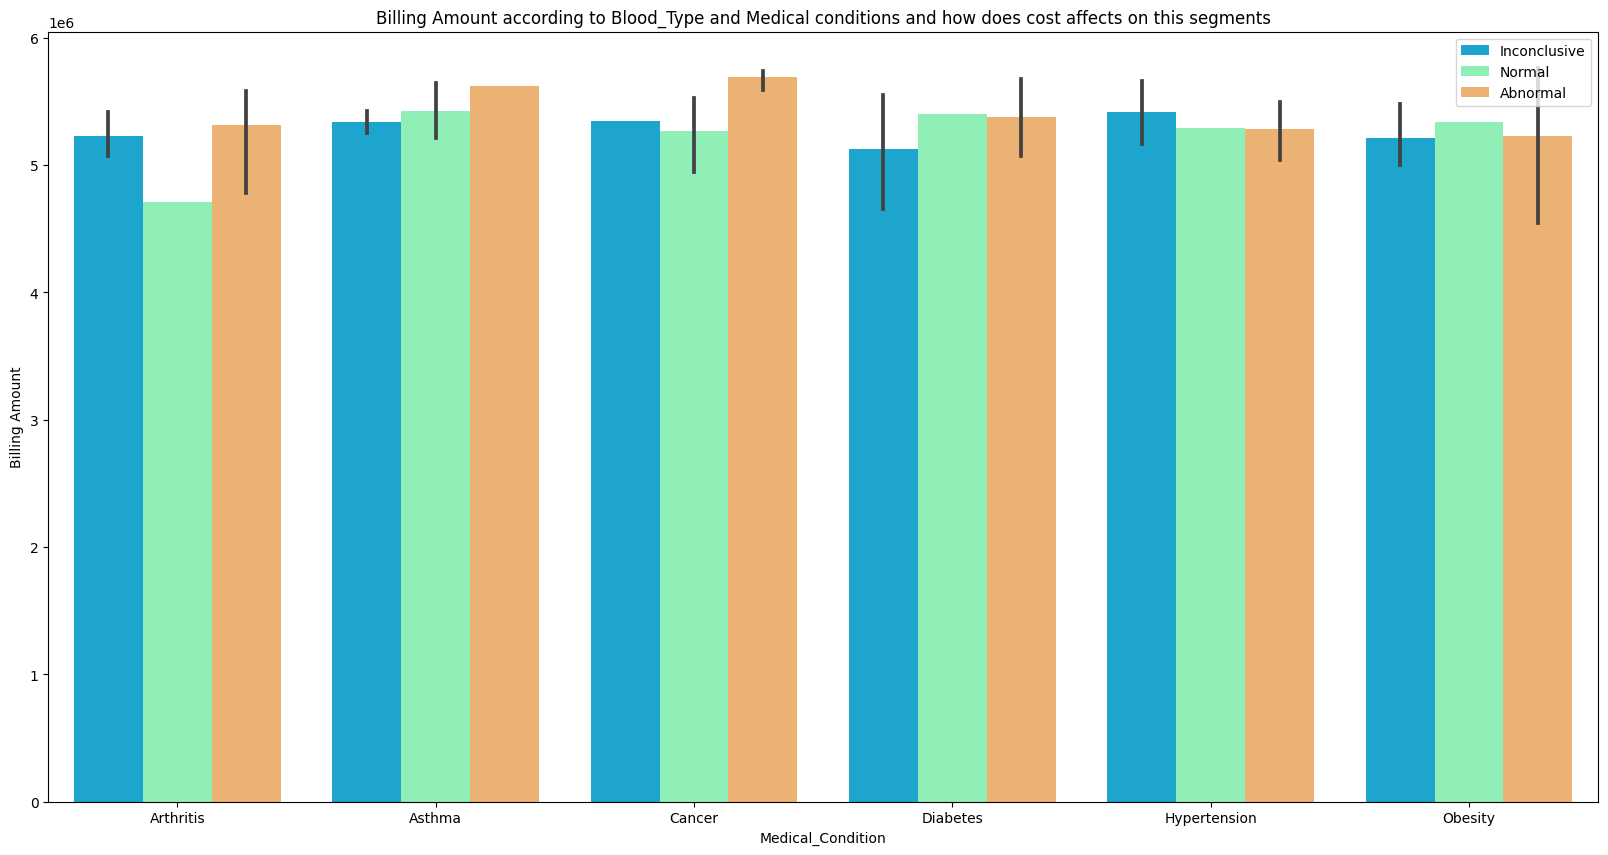

In [31]:
# Billing Amount according to Medical Condition and Test Results
df1 = df.groupby(['Blood_Type', 'Medical_Condition'])[['Billing_Amount']].sum().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x=df1['Medical_Condition'], y=df1['Billing_Amount'], hue=df['Test_Results'], palette="rainbow")
plt.title("Billing Amount according to Blood_Type and Medical conditions and how does cost affects on this segments")
plt.legend(loc='upper right')
plt.ylabel("Billing Amount")
plt.xticks(rotation=0, fontsize = 10)
plt.show()

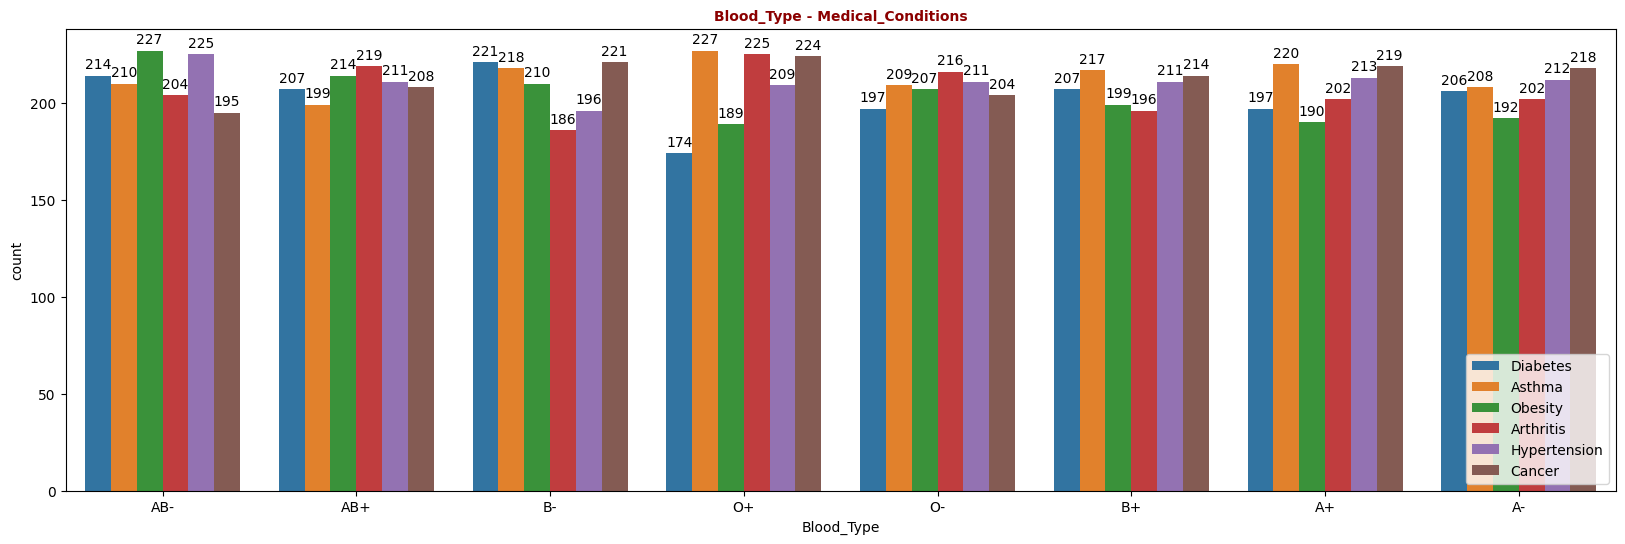

In [32]:
#Blood_Type - Medical_Conditions

fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(df, x = "Blood_Type", hue=df['Medical_Condition'],ax = ax,order=df['Blood_Type'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Blood_Type - Medical_Conditions", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- In *AB-* we can view that most of *patient* are in Hypertention or obesity as both are connected if you are in obesity then most probably you can be in hypertention
- In *AB+* most *patient* are target of *Arthritis* and *Obesity*
- In *B-* most of *patient* are target of *Cancer* & *Diabetes*
- In *O+* most of *patient* are target of *Asthma*


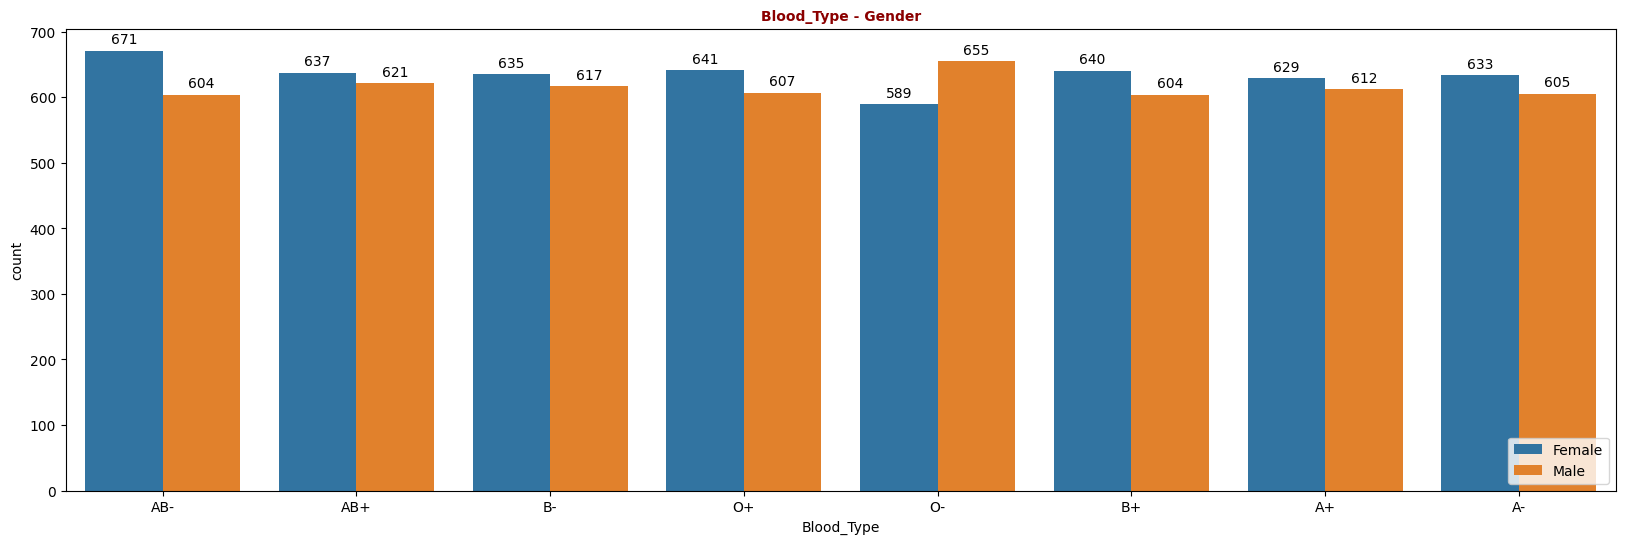

In [33]:
#Blood_Type - Gender

fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(df, x = "Blood_Type", hue=df['Gender'],ax = ax,order=df['Blood_Type'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Blood_Type - Gender", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

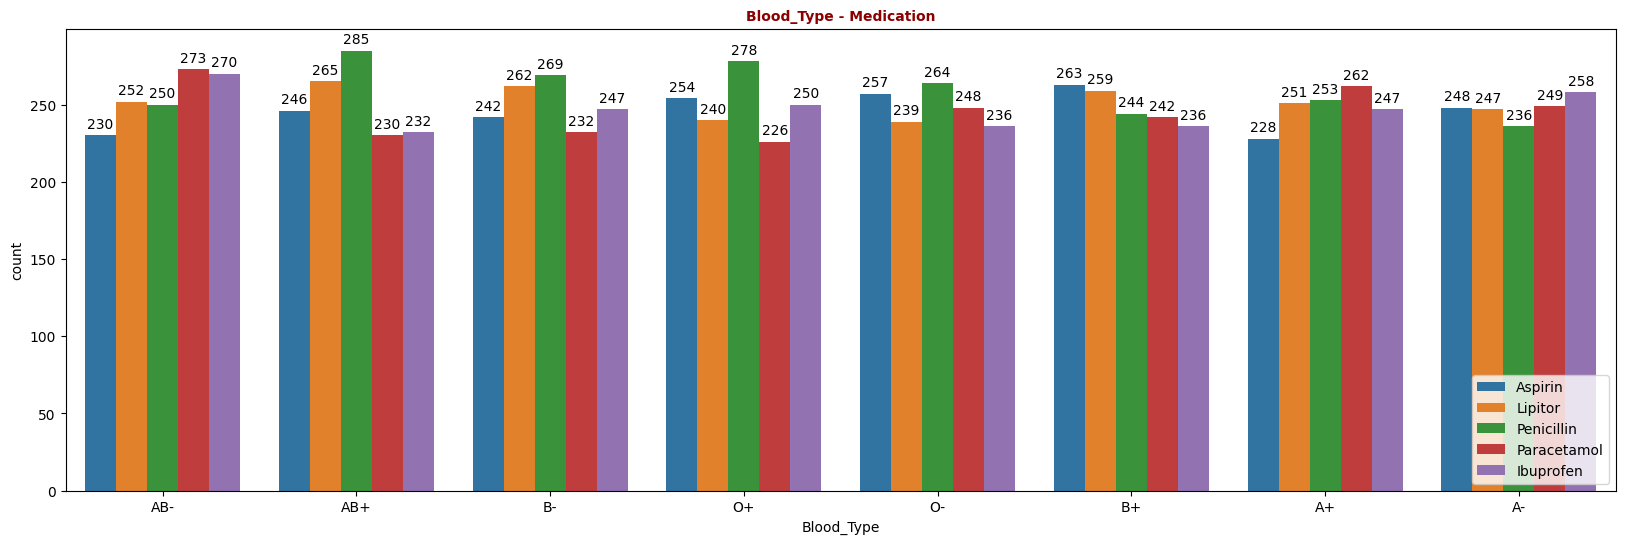

In [34]:
#Blood_Type - Medication

fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(df, x = "Blood_Type", hue=df['Medication'],ax = ax,order=df['Blood_Type'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Blood_Type - Medication", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

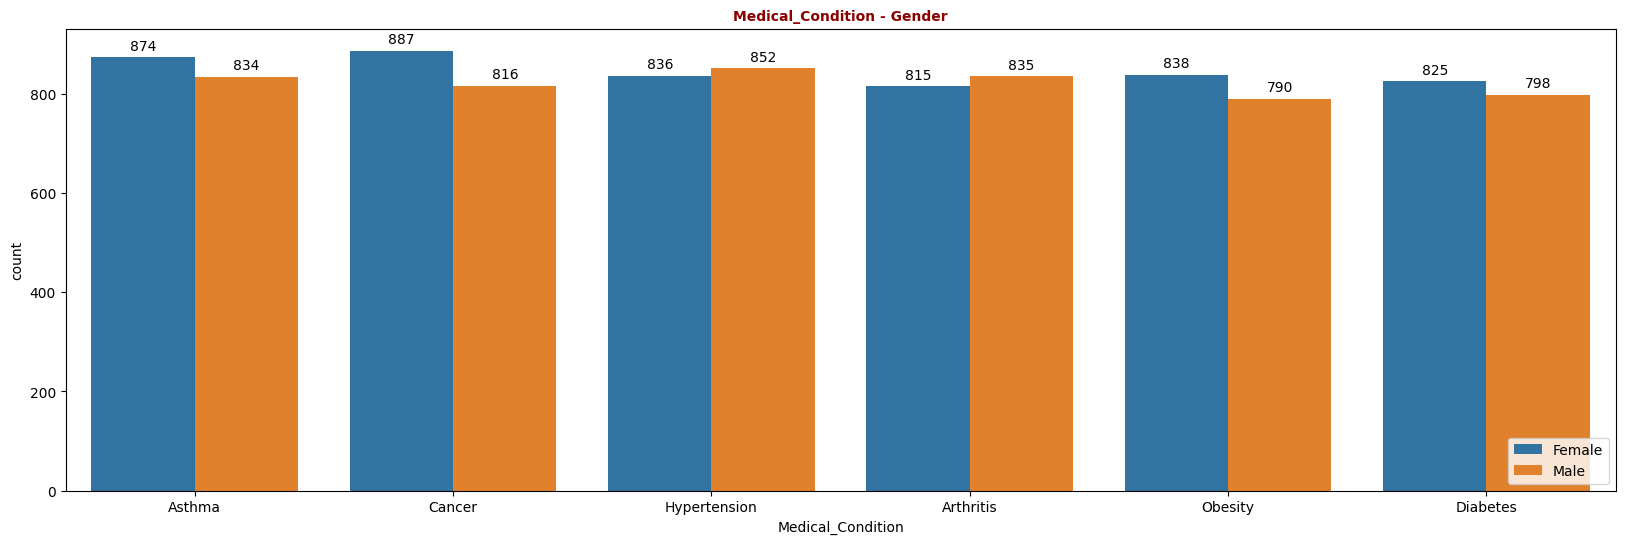

In [35]:
#Medical_Condition - Gender

fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(df, x = "Medical_Condition", hue=df['Gender'],ax = ax,order=df['Medical_Condition'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Medical_Condition - Gender", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

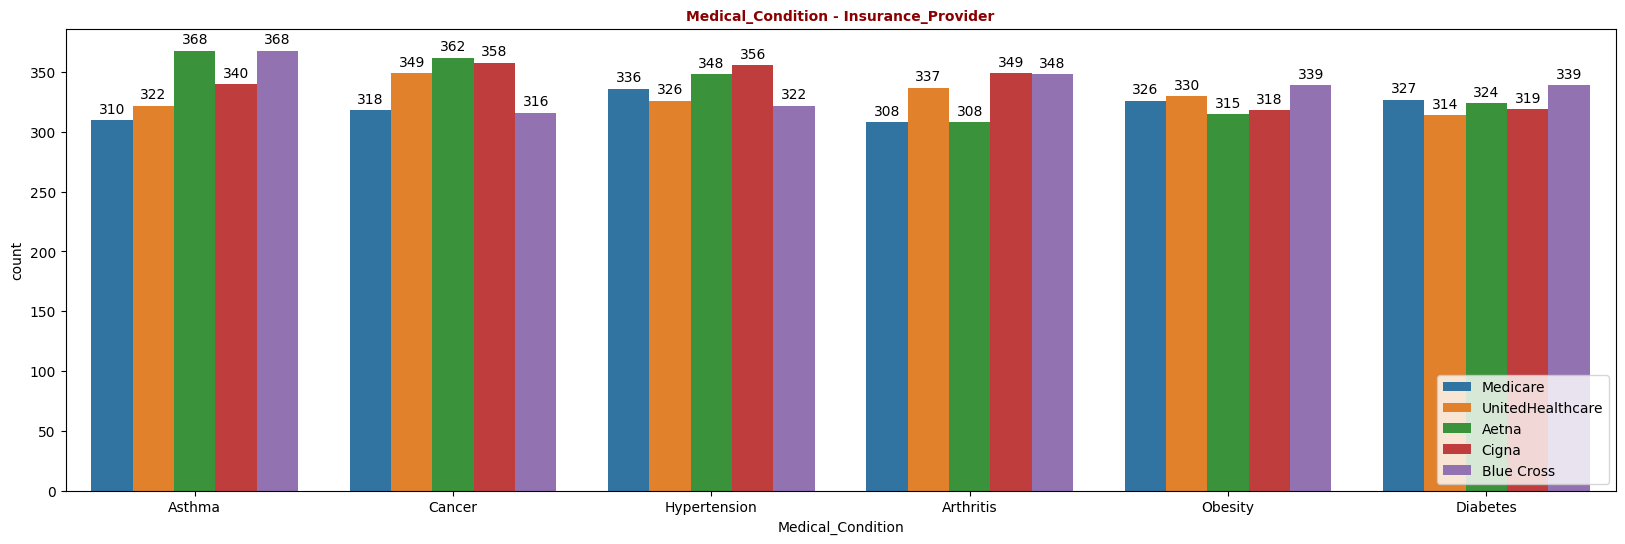

In [36]:
#Medical_Condition - Insurance_Provider

fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(df, x = "Medical_Condition", hue=df['Insurance_Provider'],ax = ax,order=df['Medical_Condition'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Medical_Condition - Insurance_Provider", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

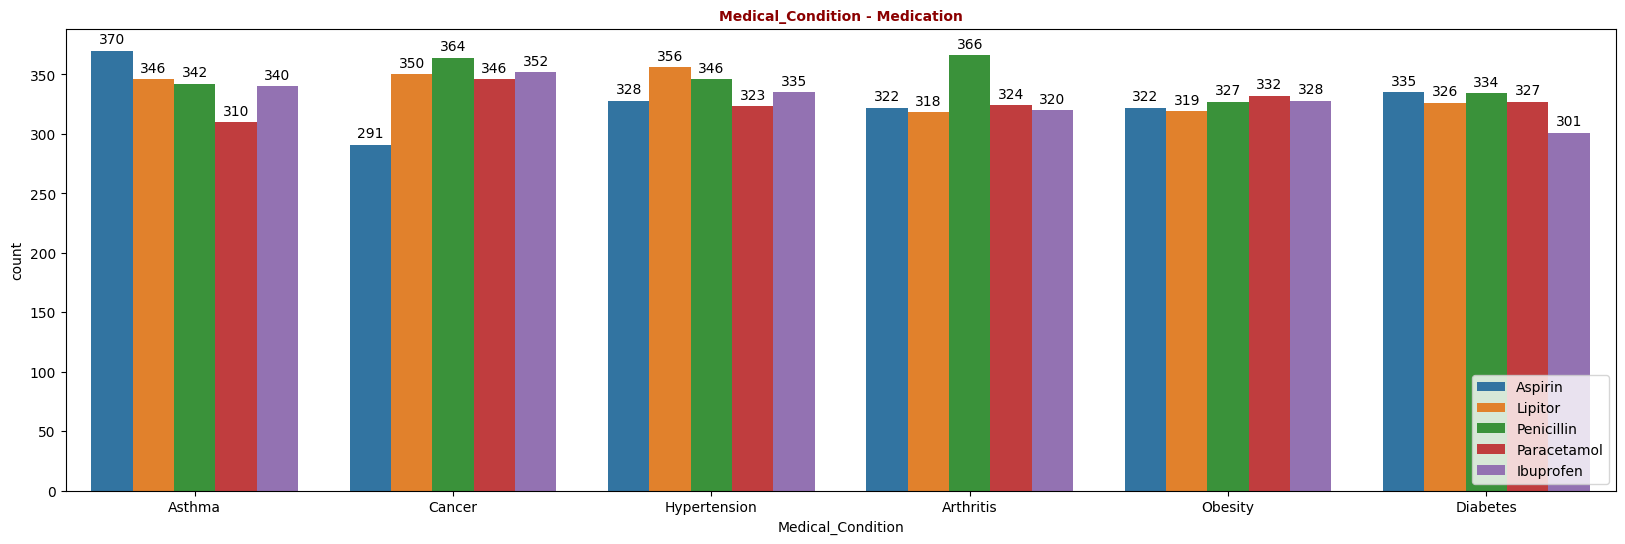

In [37]:
#Medical_Condition - Medication

fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(df, x = "Medical_Condition", hue=df['Medication'],ax = ax,order=df['Medical_Condition'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Medical_Condition - Medication", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- In *Arthritis* most repeated *medication* is *Penicillin*
- In *Asthma* most repeated *medication* is *Aspirin*

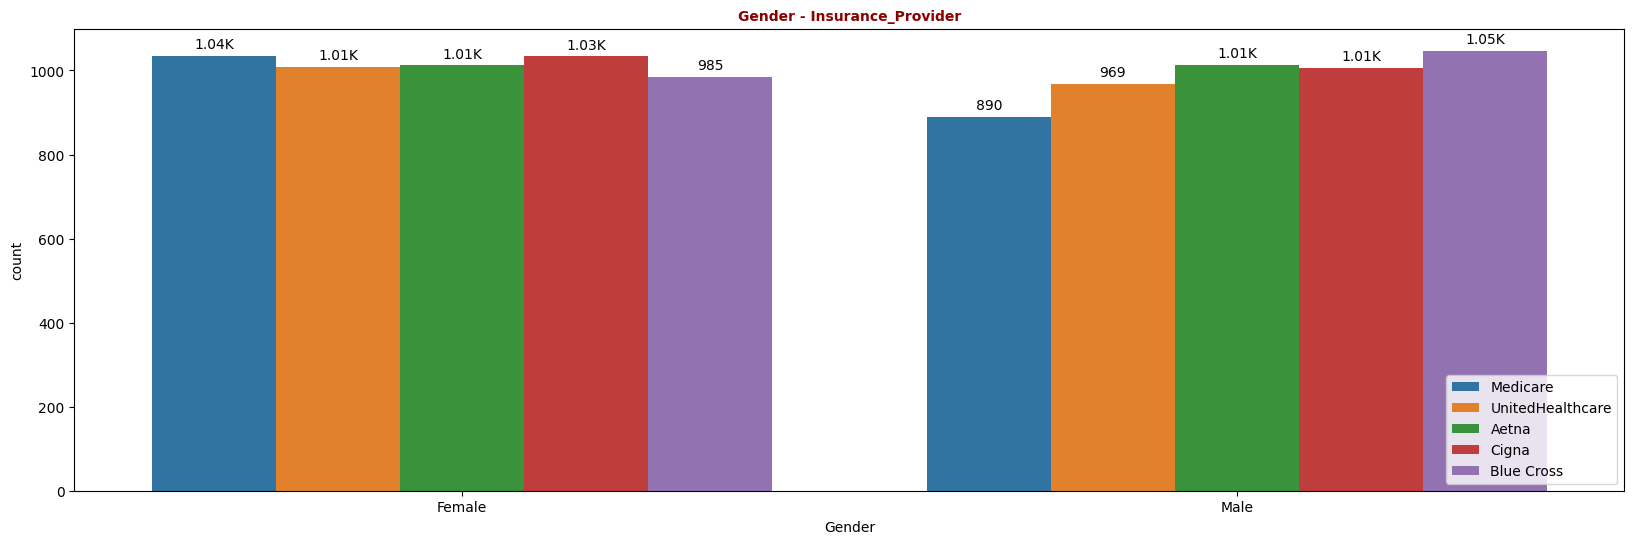

In [38]:
#Gender - Insurance_Provider

fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(df, x = "Gender", hue=df['Insurance_Provider'],ax = ax,order=df['Gender'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Gender - Insurance_Provider", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- In female segment best facility is provided by Medicore and in Male segments it is totally different, in male Blue Cross is most famous

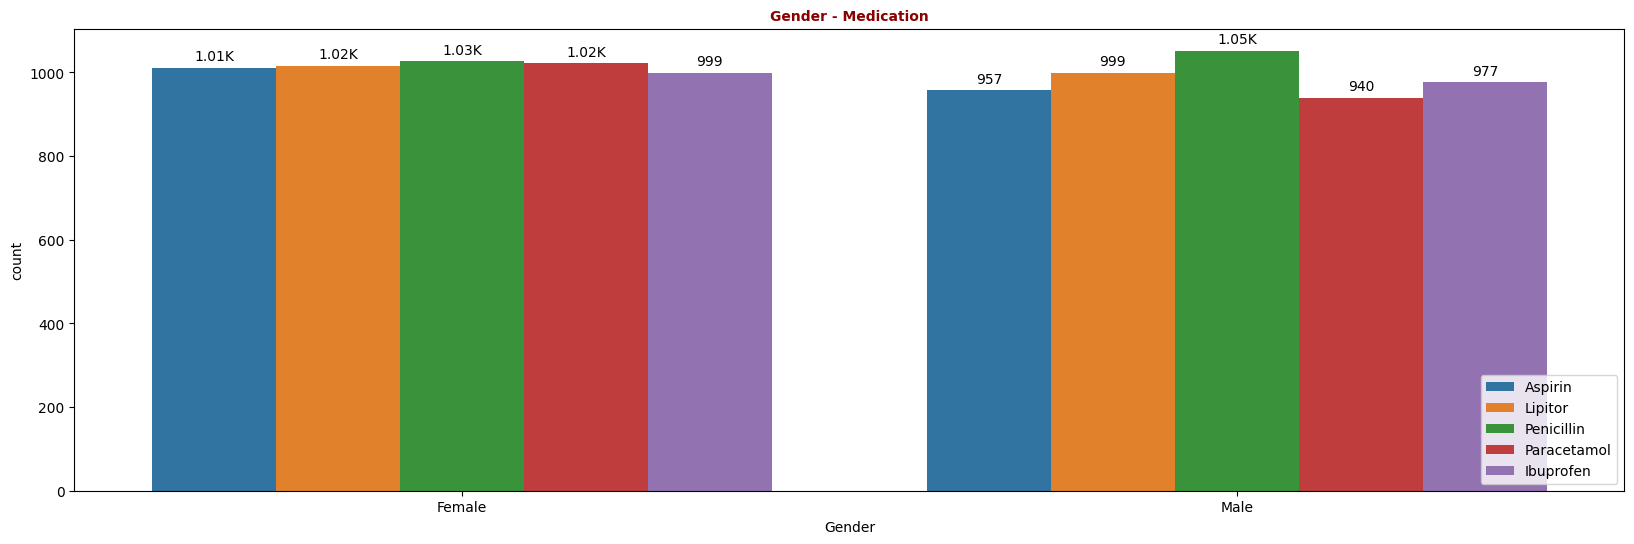

In [39]:
#Gender - Medication

fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(df, x = "Gender", hue=df['Medication'],ax = ax,order=df['Gender'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Gender - Medication", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- In this graph we can see that male are having highest *medication* of *Penicillin* maybe most of male will be having *Arthritis*

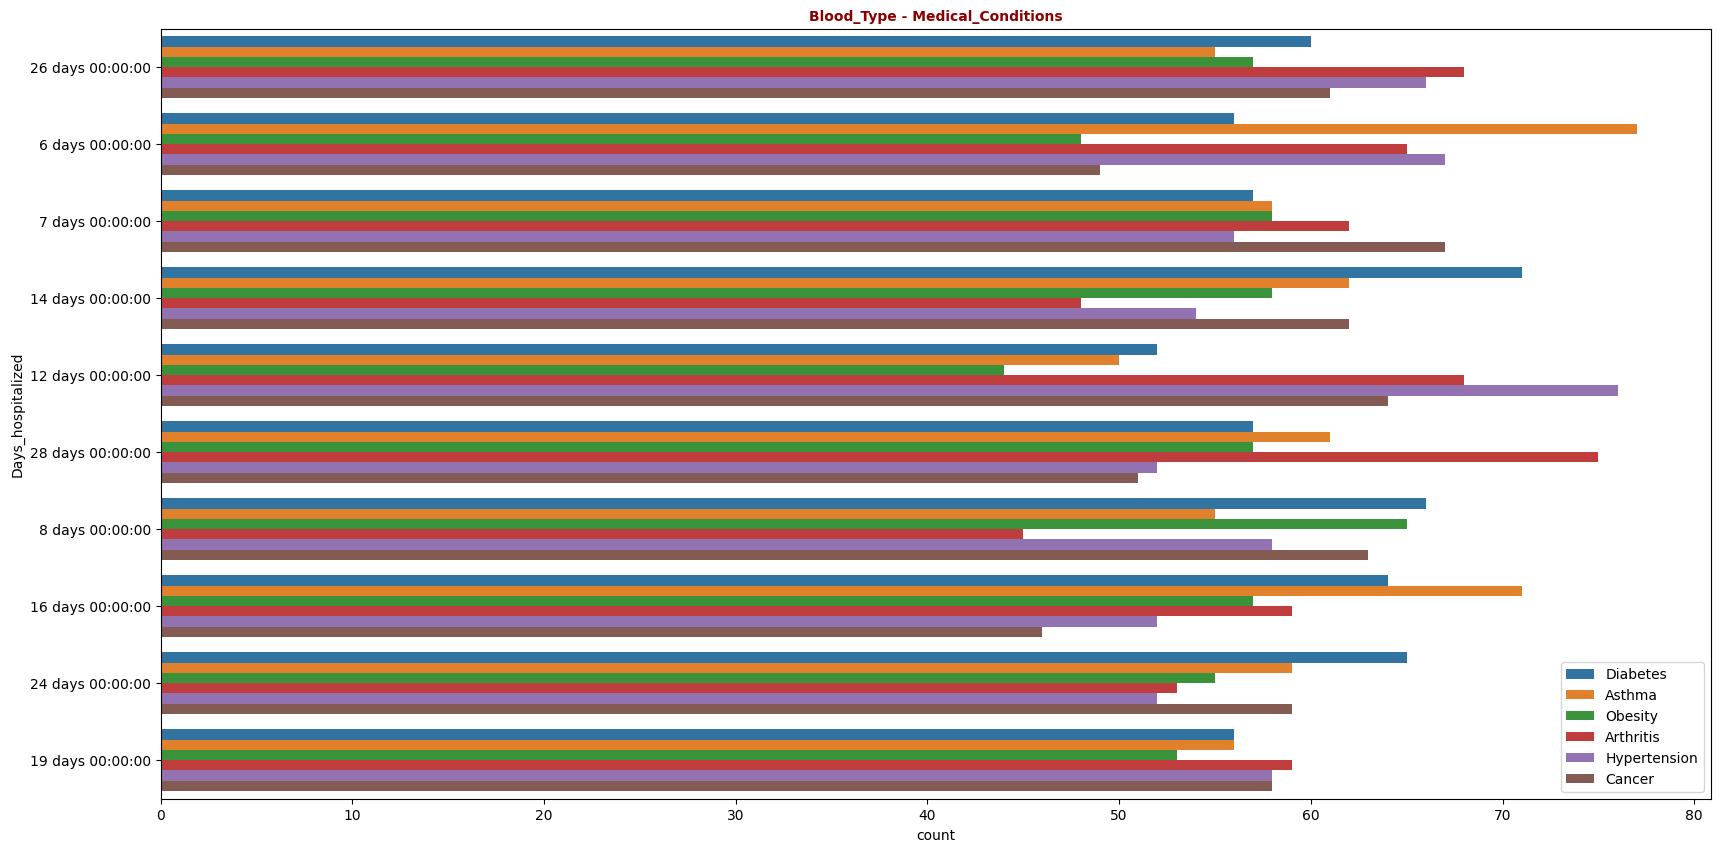

In [40]:
#Days_Hospitalized - Medical_Conditions

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, y = "Days_hospitalized", hue=df['Medical_Condition'],ax = ax,order=df['Days_hospitalized'].value_counts().iloc[:10].index)
plt.legend(loc='lower right')
ax.set_title("Blood_Type - Medical_Conditions", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

**Model Building**

In [46]:
##Splitting data into X & y

X = df.drop(columns=['Name','Date_of_Admission','Billing_Amount', 'Discharge_Date','Test_Results'],axis=1)
y = df['Test_Results']

In [52]:
# Do Label encoding on y label

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [54]:
# Import category encoder and perfom on X data

import category_encoders as ce
X = ce.TargetEncoder(smoothing=0).fit_transform(X,y)

In [56]:
#Train-test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)


(8000, 15) (2000, 15)


In [57]:
#Standarscaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
X_train.shape

(8000, 15)

In [69]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(X_train,y_train)


RandomForestClassifier()

In [70]:
pred_2 = random.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score
acc = accuracy_score (y_test, pred_2)
print("Acc: %.2f%%" % (acc * 100.0))

Acc: 34.55%
